# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

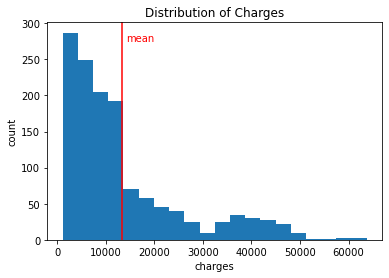

In [4]:
_ = plt.hist(medical['charges'], bins = 20)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Charges')
_ = plt.axvline(np.mean(medical.charges), color='r')
_ = plt.text(np.mean(medical.charges)+1000,275,'mean', color='r')

plt.show()

In [5]:
charges_mean = np.mean(medical.charges)
charges_std = np.std(medical.charges)
print("The mean of charges is", charges_mean)
print("The standard deviation of charges is", charges_std)
print("The spread of the data is pretty large and not normally distributed. The histogram shows a skew to the right.")

The mean of charges is 13270.422265141257
The standard deviation of charges is 12105.484975561605
The spread of the data is pretty large and not normally distributed. The histogram shows a skew to the right.


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  On the assumption that the data represents a random sample of charges, it would be most appropriate to use a t-statistic frequentist test, due to the population standard deviation being unknown, to test if 12,000 (<12000) is within the confidence interval of the mean. If 12,000 is included within the condifence interval of the mean, the administrator would have cause for concern. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate condifence interval is ***one-sided*** since we need to determine if charges are below 12,000.

margin of error (MoE) = Critical value x Standard error of the sample.

Critical value<br>
Given 95% confidence level <br>
one sided test: (1 + confidence level)/2 = (1 +.95)/2 = .975 <br>
Degrees of freedom = n - 1 = len(medical.charges)-1
Referencing the t table, t-score = 2.009575234489209 <br>
t.ppf(0.975,df=len(medical.charges)-1) would also work <br>

standard error = s / √ (n) <br>
 
The Margin of Error at a confidence level of 95% is 1.1628909342876539



In [6]:
# Calculate the critical t value:
critical_value = t.ppf(0.975, df=len(medical.charges)-1)
print("The critical value: ", critical_value)

The critical value:  1.961739888600845


In [7]:
# Calculate the Standard Error:
standard_error = np.std(medical.charges)/(len(medical.charges) ** 0.5)
print("The standard error: ", standard_error)

The standard error:  330.943713906084


In [8]:
# Calculate the Margin of Error:
margin_error = critical_value * standard_error
print("The margin of error: ", margin_error)

The margin of error:  649.2254844512711


In [9]:
# Calculate confidence interval:
lower_limit = round(charges_mean - margin_error,2)
if lower_limit < 12000:
    concern = 'the administration should be concerned'
else:
    concern = 'the administration should not be concerned'

print('The lower limit of the 95% confidence interval of the mean is', lower_limit, "so " + concern + ".")

The lower limit of the 95% confidence interval of the mean is 12621.2 so the administration should not be concerned.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: Both groups are being charged the same. <br>
Alternative hypothesis: The groups are being charged different amounts. <br>
We are assuming that both groups have the same standard deviation. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

Manual hypothesis test steps: <br>
1. Create 2 dataframes (insured, non_insured) <br>
2. Count values in both groups <br>
3. Calculate means of both groups. 
4. Calculate degrees of freedom (both groups added together minus 1).
5. Calculate standard deviation for both groups. 
6. Calculate pooled stadard deviation. 
7. Calculate t-test statistic.
8. Calculate p-value.
9. Calculate critical value.


In [10]:
# dataframes
no_insurance = medical[medical['insuranceclaim'] == 0]
insurance = medical[medical['insuranceclaim'] == 1]

In [11]:
# counts
n0 = len(no_insurance)
n1 = len(insurance)
print(n0, n1)

555 783


In [12]:
# means
m0 = np.mean(no_insurance.charges)
m1 = np.mean(insurance.charges)

print(m0, m1)

8821.421892306294 16423.928276537663


In [13]:
# degrees of freedom
df = n0+n1-2 
print(df)

1336


In [14]:
# standard deviation
std0 = np.std(no_insurance.charges,ddof=1)
std1 = np.std(insurance.charges,ddof=1)
print(std0, std1)

6446.510126811736 14045.928418802127


In [15]:
# pooled standard deviation
std_pooled = ((((n0 - 1) * std0 **2) + ((n1 - 1) * std1 **2))/(df)) ** 0.5
print(std_pooled)

11520.034268775256


In [16]:
t_test = (m0 - m1)/((((1/n0) + (1/n1)) ** 0.5) * std_pooled)
print(t_test)

-11.89329903087671


In [17]:
# p-value
2*(t.cdf(-abs(t_test), df))


4.461230231620972e-31

In [18]:
# critical value
critical_value = t.ppf(0.025, df)
print(critical_value)

-1.9617412190546961


In [19]:
#Using scipy.stats

from scipy import stats
stats.ttest_ind(no_insurance.charges,insurance.charges)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

__A:__ Because the t-test statistic is much smaller than the crutical value, we are able to reject the null hypothesis, meaning that people are being charged differently based on insurance status. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, there is no equivalent test function since both samples would have to be normally distributed. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test